## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy import stats

### Import csv and data description

In [2]:
housing_df = pd.read_csv("from-jan-2015-onward.csv")
housing_df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,840,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,780,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,768,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,756,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,768,290000.0


In [3]:
housing_df.describe()

,floor_area_sqm,lease_commence_date,remaining_lease,resale_price
count,112626.000000,112626.000000,112626.000000,1.126260e+05
mean,97.402861,1992.962753,893.013070,4.378528e+05
std,24.254935,12.233117,145.769597,1.477767e+05
min,31.000000,1966.000000,546.000000,1.400000e+05
25%,77.000000,1984.000000,782.000000,3.330000e+05
50%,95.000000,1992.000000,885.500000,4.080000e+05
75%,112.000000,2002.000000,1001.000000,5.060000e+05
max,280.000000,2018.000000,1165.000000,1.232000e+06


In [4]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112626 entries, 0 to 112625
Data columns (total 11 columns):
month                  112626 non-null object
town                   112626 non-null object
flat_type              112626 non-null object
block                  112626 non-null object
street_name            112626 non-null object
storey_range           112626 non-null object
floor_area_sqm         112626 non-null float64
flat_model             112626 non-null object
lease_commence_date    112626 non-null int64
remaining_lease        112626 non-null int64
resale_price           112626 non-null float64
dtypes: float64(2), int64(2), object(7)
memory usage: 9.5+ MB


In [13]:
housing_df["full_address"] = housing_df["street_name"] + " BLOCK " + housing_df["block"]
housing_df

,month,town,flat_type,block,street_name,flat_model,scaled_floor_area_sqm,scaled_lease_commence_date,scaled_remaining_lease,scaled_resale_price,scaled_storey_range,full_address
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,Improved,-1.542079,-0.569175,-0.363679,-1.237364,-0.081788,ANG MO KIO AVE 4 BLOCK 174
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,New Generation,-1.212248,-0.977903,-0.775289,-1.102024,-1.151769,ANG MO KIO AVE 10 BLOCK 541
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,New Generation,-1.171019,-1.059649,-0.857611,-1.034354,-1.151769,ANG MO KIO AVE 4 BLOCK 163
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,New Generation,-1.212248,-1.141395,-0.939933,-1.000519,-1.151769,ANG MO KIO AVE 10 BLOCK 446
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,New Generation,-1.212248,-1.059649,-0.857611,-1.000519,-0.081788,ANG MO KIO AVE 10 BLOCK 557
5,2015-01,ANG MO KIO,3 ROOM,603,ANG MO KIO AVE 5,New Generation,-1.253477,-1.059649,-0.857611,-1.000519,-0.081788,ANG MO KIO AVE 5 BLOCK 603
6,2015-01,ANG MO KIO,3 ROOM,709,ANG MO KIO AVE 8,New Generation,-1.212248,-1.059649,-0.857611,-1.000519,-1.151769,ANG MO KIO AVE 8 BLOCK 709
7,2015-01,ANG MO KIO,3 ROOM,333,ANG MO KIO AVE 1,New Generation,-1.212248,-0.977903,-0.775289,-0.980218,-1.151769,ANG MO KIO AVE 1 BLOCK 333
8,2015-01,ANG MO KIO,3 ROOM,109,ANG MO KIO AVE 4,New Generation,-1.253477,-1.223140,-1.022255,-0.932849,-1.151769,ANG MO KIO AVE 4 BLOCK 109
9,2015-01,ANG MO KIO,3 ROOM,564,ANG MO KIO AVE 3,New Generation,-1.212248,-0.650921,-0.446001,-0.882097,0.988193,ANG MO KIO AVE 3 BLOCK 564


### Convert storey_range to categorical variable

In [14]:
housing_df = pd.read_csv("from-jan-2015-onward.csv")
cleanup_categories = {"storey_range":{"01 TO 03": 1, "04 TO 06": 2, "07 TO 09": 3, "10 TO 12": 4, "13 TO 15": 5, "16 TO 18": 6, "19 TO 21": 7, "22 TO 24": 8, "25 TO 27": 9, "28 TO 30": 10, "31 TO 33": 11, "34 TO 36": 12, "37 TO 39": 13, "40 TO 42": 14, "43 TO 45": 15, "46 TO 48": 16, "49 TO 51": 17}}
housing_df.replace(cleanup_categories, inplace=True)

### Standardize/Normalize data

In [15]:
from sklearn.preprocessing import StandardScaler
from scipy import stats

ss = StandardScaler()

data = ss.fit_transform(housing_df[['floor_area_sqm', 'lease_commence_date', 'remaining_lease', 'resale_price', 'storey_range']])
data = ss.fit_transform(data)
scaled_dataset = pd.DataFrame(data)
scaled_dataset.columns = ['scaled_floor_area_sqm', 'scaled_lease_commence_date', 'scaled_remaining_lease', 'scaled_resale_price', 'scaled_storey_range']
scaled_dataset.head()

,scaled_floor_area_sqm,scaled_lease_commence_date,scaled_remaining_lease,scaled_resale_price,scaled_storey_range
0,-1.542079,-0.569175,-0.363679,-1.237364,-0.081788
1,-1.212248,-0.977903,-0.775289,-1.102024,-1.151769
2,-1.171019,-1.059649,-0.857611,-1.034354,-1.151769
3,-1.212248,-1.141395,-0.939933,-1.000519,-1.151769
4,-1.212248,-1.059649,-0.857611,-1.000519,-0.081788


In [16]:
housing_df = pd.concat([housing_df,scaled_dataset], axis=1)
housing_df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,scaled_floor_area_sqm,scaled_lease_commence_date,scaled_remaining_lease,scaled_resale_price,scaled_storey_range
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,3,60.0,Improved,1986,840,255000.0,-1.542079,-0.569175,-0.363679,-1.237364,-0.081788
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,1,68.0,New Generation,1981,780,275000.0,-1.212248,-0.977903,-0.775289,-1.102024,-1.151769
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,1,69.0,New Generation,1980,768,285000.0,-1.171019,-1.059649,-0.857611,-1.034354,-1.151769
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,1,68.0,New Generation,1979,756,290000.0,-1.212248,-1.141395,-0.939933,-1.000519,-1.151769
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,3,68.0,New Generation,1980,768,290000.0,-1.212248,-1.059649,-0.857611,-1.000519,-0.081788


In [17]:
df = housing_df.drop(["resale_price","floor_area_sqm","lease_commence_date","remaining_lease","storey_range"],1)
df.corr()

,scaled_floor_area_sqm,scaled_lease_commence_date,scaled_remaining_lease,scaled_resale_price,scaled_storey_range
scaled_floor_area_sqm,1.000000,0.249521,0.253470,0.639770,0.022447
scaled_lease_commence_date,0.249521,1.000000,0.993134,0.333125,0.273192
scaled_remaining_lease,0.253470,0.993134,1.000000,0.337237,0.271719
scaled_resale_price,0.639770,0.333125,0.337237,1.000000,0.369607
scaled_storey_range,0.022447,0.273192,0.271719,0.369607,1.000000


In [18]:
housing_df = housing_df.drop(["resale_price","floor_area_sqm","lease_commence_date","remaining_lease","storey_range"],1)

### We can drop either lease_commence_date or remaining_lease as they have extremely high correlation to one another

### Now, try random forest for feature selection

In [19]:
from sklearn.ensemble import RandomForestRegressor
df= df.drop(["month", "town", "flat_type", "block", "street_name", "flat_model","scaled_resale_price"], axis=1)
model = RandomForestRegressor(random_state=1, max_depth=10)
df = pd.get_dummies(df)
model.fit(df, housing_df.scaled_resale_price)
df.head()

C:\Users\yiehy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,scaled_floor_area_sqm,scaled_lease_commence_date,scaled_remaining_lease,scaled_storey_range
0,-1.542079,-0.569175,-0.363679,-0.081788
1,-1.212248,-0.977903,-0.775289,-1.151769
2,-1.171019,-1.059649,-0.857611,-1.151769
3,-1.212248,-1.141395,-0.939933,-1.151769
4,-1.212248,-1.059649,-0.857611,-0.081788


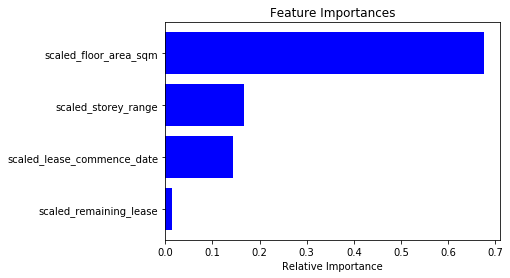

In [20]:
features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()